In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
from io import BytesIO

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!git clone https://github.com/DanhVinhLe/Stable-Diffusion-from-Scratch.git

Cloning into 'Stable-Diffusion-from-Scratch'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 108 (delta 50), reused 95 (delta 37), pack-reused 0 (from 0)
Receiving objects: 100% (108/108), 27.89 KiB | 4.65 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [3]:
!wget https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt

--2025-04-15 03:49:37--  https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt
Resolving huggingface.co (huggingface.co)... 3.166.152.65, 3.166.152.110, 3.166.152.105, ...
Connecting to huggingface.co (huggingface.co)|3.166.152.65|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/66/6f/666f465fa70158515404e8de2c6bc6fe2f90c46f9296293aa14daededeb32c52/cc6cb27103417325ff94f52b7a5d2dde45a7515b25c255d8e396c90014281516?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27v1-5-pruned-emaonly.ckpt%3B+filename%3D%22v1-5-pruned-emaonly.ckpt%22%3B&Expires=1744692082&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0NDY5MjA4Mn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy82Ni82Zi82NjZmNDY1ZmE3MDE1ODUxNTQwNGU4ZGUyYzZiYzZmZTJmOTBjNDZmOTI5NjI5M2FhMTRkYWVkZWRlYjMyYzUyL2NjNmNiMjcxMDM0MTczMjVmZjk0ZjUyYjdhNWQyZGRlNDVhNzUxNWIyNWMyNTVkOGUzOT

In [4]:
mv Stable-Diffusion-from-Scratch Stable_Diffusion_from_scratch

In [5]:
# %cd Stable_Diffusion_from_scratch

In [6]:
# !git pull origin main

In [7]:
import sys
sys.path.append("/kaggle/working/Stable_Diffusion_from_scratch/stable_diffusion")

Using device: cuda


100%|██████████| 50/50 [00:14<00:00,  3.38it/s]


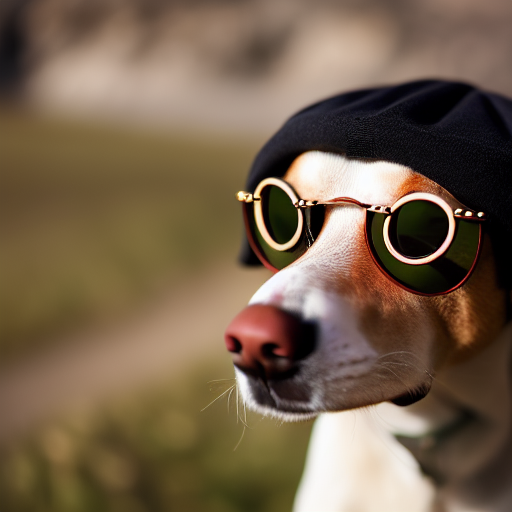

In [25]:
from Stable_Diffusion_from_scratch.stable_diffusion import *
from Stable_Diffusion_from_scratch.stable_diffusion import model_loader 
from Stable_Diffusion_from_scratch.stable_diffusion import pipeline 
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = True

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
model_file = "/kaggle/working/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
# prompt = "A dog stretching on the floor, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
# image_path = "../images/dog.jpg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_images=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_step=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)